In [1]:
import os
os.chdir('../../src')
print(os.listdir())

['configs', 'data', 'models', 'train', 'utils', 'evaluate', 'test', 'desktop.ini']


Device: cuda
set seed to 42

--------------------------------------------------

Training fold 3
Horizon definition:  {'in_freq': 30, 'pct_thresh': 0.15, 'lookahead': 6}


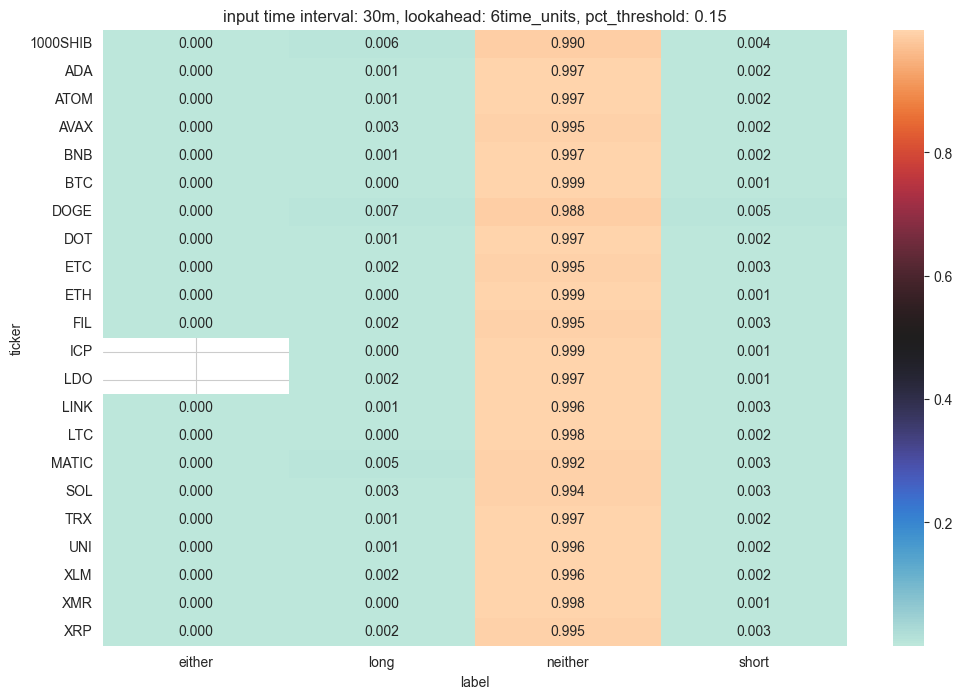

class weights: [0.004296023362643897, 0.9980756389731378, 0.997703960547381, 0.9999243771168373]
Training with {'train': 4, 'valid': 1, 'test': 4} batches
2020-01-01 00:00:00 2023-10-13 23:30:00
Baseline:
Validation accuracies by labels:  {0: 0.0, 1: 0.0, 2: 0.0, 3: 1.0}

>>> [2024-01-11 14:56:33.593339 | 0/20 | Early stopping counter 1] 
    loss          - train: 1.376851     valid: 1.371364 
    score         - train: 0.000061     valid: 0.000008 
    learning rate        : 1.00000e-04



Epoch 1 | batch 1 / 4: 100%|██████████| 7519/7519 [01:00<00:00, 124.18it/s, batch_loss=0.024368, epoch_loss=0.302382, learning_rate=0.0001]
Epoch 1 | batch 2 / 4: 100%|██████████| 12094/12094 [01:46<00:00, 113.06it/s, batch_loss=0.135769, epoch_loss=0.348157, learning_rate=0.0001]
Epoch 1 | batch 3 / 4: 100%|██████████| 13351/13351 [01:56<00:00, 114.35it/s, batch_loss=0.104273, epoch_loss=0.346873, learning_rate=0.0001]
Epoch 1 | batch 4 / 4: 100%|██████████| 13467/13467 [02:03<00:00, 108.72it/s, batch_loss=0.018117, epoch_loss=0.279295, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.99722, 1: 0.04724, 2: 0.29771, 3: 0.0}
>>> [2024-01-11 15:05:48.952970] - Checkpoint and predictions saved

>>> [2024-01-11 15:05:48.952970 | 1/20 | Early stopping counter 0] 
    loss          - train: 0.259732     valid: 0.054966 
    score         - train: 0.310527     valid: 0.294895 
    learning rate        : 1.00000e-04



Epoch 2 | batch 1 / 4: 100%|██████████| 7519/7519 [01:00<00:00, 125.14it/s, batch_loss=0.022926, epoch_loss=0.186229, learning_rate=0.0001]
Epoch 2 | batch 2 / 4: 100%|██████████| 12094/12094 [01:42<00:00, 117.69it/s, batch_loss=0.025225, epoch_loss=0.267568, learning_rate=0.0001]
Epoch 2 | batch 3 / 4: 100%|██████████| 13351/13351 [02:00<00:00, 110.47it/s, batch_loss=0.020175, epoch_loss=0.274578, learning_rate=0.0001]
Epoch 2 | batch 4 / 4: 100%|██████████| 13467/13467 [02:18<00:00, 97.09it/s, batch_loss=0.005806, epoch_loss=0.220177, learning_rate=0.0001] 


Validation accuracies by labels:  {0: 0.99889, 1: 0.11024, 2: 0.07634, 3: 0.0}
>>> [2024-01-11 15:15:05.736073] - Checkpoint and predictions saved

>>> [2024-01-11 15:15:05.736073 | 2/20 | Early stopping counter 0] 
    loss          - train: 0.253177     valid: 0.049165 
    score         - train: 0.365470     valid: 0.298183 
    learning rate        : 1.00000e-04



Epoch 3 | batch 1 / 4: 100%|██████████| 7519/7519 [01:02<00:00, 120.66it/s, batch_loss=0.014507, epoch_loss=0.158819, learning_rate=0.0001]
Epoch 3 | batch 2 / 4: 100%|██████████| 12094/12094 [01:42<00:00, 118.14it/s, batch_loss=0.254065, epoch_loss=0.235525, learning_rate=0.0001]
Epoch 3 | batch 3 / 4: 100%|██████████| 13351/13351 [01:53<00:00, 117.15it/s, batch_loss=0.141432, epoch_loss=0.240321, learning_rate=0.0001]
Epoch 3 | batch 4 / 4: 100%|██████████| 13467/13467 [02:03<00:00, 109.23it/s, batch_loss=0.003832, epoch_loss=0.190456, learning_rate=0.0001]


Validation accuracies by labels:  {0: 0.9989, 1: 0.11024, 2: 0.00763, 3: 0.0}

>>> [2024-01-11 15:23:49.753333 | 3/20 | Early stopping counter 1] 
    loss          - train: 0.235630     valid: 0.052016 
    score         - train: 0.412560     valid: 0.273753 
    learning rate        : 1.00000e-04



Epoch 4 | batch 1 / 4: 100%|██████████| 7519/7519 [00:59<00:00, 126.33it/s, batch_loss=0.164825, epoch_loss=0.141834, learning_rate=0.0001]
Epoch 4 | batch 2 / 4: 100%|██████████| 12094/12094 [01:40<00:00, 119.85it/s, batch_loss=0.037495, epoch_loss=0.209219, learning_rate=0.0001]
Epoch 4 | batch 3 / 4:  11%|█         | 1465/13351 [00:12<01:45, 112.16it/s, batch_loss=0.136000, epoch_loss=0.210565, learning_rate=0.0001]

In [2]:
from configs.config import Config
from train.train import train_model

# fold is fixed to 3
seed = 42
for in_freq in [30, 15]:
    for pct_thresh in [15, 10, 5]:
        for lookahead in [6, 4, 2]:
            config = Config()
            config.data_dir = '../data'
            config.models_dir = '../models'
            config.horizon_def = {
                'in_freq' : in_freq,
                'pct_thresh': pct_thresh / 100.,
                'lookahead': lookahead
            }   
            config.prep_data_path = "D:\data"
            config.max_len = 64
            config.fold = 3
            config.model_name = f'hslstm_intra_f1-macro_on_start/in_freq{in_freq}m-lookahead{lookahead}-pct_thresh{pct_thresh}-seed{seed}'
            config.train_with_external_drive = False
            config.sample_run = False
            config.lr_patience = 2
            config.lr_multiplier = 0.5
            config.num_epochs = 20 if in_freq == 30 else 5
            config.learning_rate = 1e-4
            config.project_on_intrarange = True
            config.features = config.features + ['pct_chg_low', 'pct_chg_high']
            if not os.path.exists(f'{config.models_dir}/{config.model_name}'):
                config.apply_seed(seed = seed)
                results = train_model(config = config)